In [94]:
# Importing Relevant Libraries
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import pylab
import collections
import pymongo
import psycopg2
import paho.mqtt.client as mqtt
import seaborn as sns
from IPython import display
from pandas import datetime
from datetime import timedelta
from pymongo import MongoClient
from scipy import stats

import plotly.graph_objects as go
import plotly as py

py.offline.init_notebook_mode(connected=True)

In [95]:
# Set up MongoDB Client
client_mqtt = mqtt.Client()

# Set up NodeMCU Client
client_mongo = MongoClient('192.168.1.5')
temp_database = client_mongo['temp_collect']
data_1=temp_database['Temperature_1']
data_2=temp_database['Temperature_2']

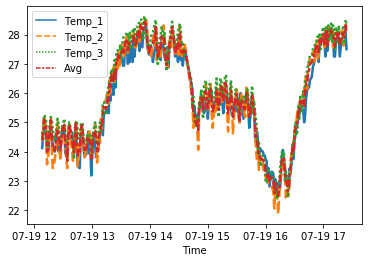

In [149]:
#Time : 2pm - 3pm , AC Temperature : 26, Date : 18/7/19
date_time=[]
tmp_1=[]
tmp_2=[]
tmp_3=[]
avg=[]
#specifying every n'th minute
time=1
#counter
c=time
for obj in data_1.find():
    time_h=(obj['Date-Time'])
   
    #if("15:" in time_h or "15:0" in time_h):
    if("07/19/2019" in time_h):
        if(c==time):
            date_time.append(datetime.strptime(obj['Date-Time'],'%m/%d/%Y %H:%M'))
            tmp_1.append(float(obj['tmp_1']))
            tmp_2.append(float(obj['tmp_2']))
            tmp_3.append(float(obj['tmp_3']))
            avg.append((float(obj['tmp_1'])+float(obj['tmp_2'])+float(obj['tmp_3']))/3)
            c=0
        c=c+1


d_2 = {'Time':date_time,'Temp_1':tmp_1,'Temp_2':tmp_2,'Temp_3':tmp_3,'Avg':avg}
data_time=pd.DataFrame(d_2)
data_time=data_time.set_index('Time')
sns.lineplot(palette="tab10", linewidth=2.5,data=data_time)

In [151]:
mov_avg_df = moving_average(data_time) 

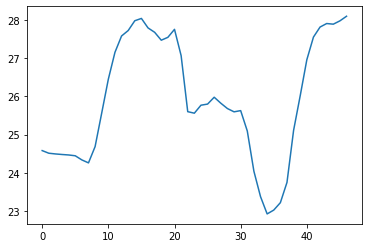

In [156]:
sns.lineplot(data=mov_avg_df ['Average'])

In [ ]:
sns.lineplot(palette="tab10", linewidth=2.5,data=data_time)


In [152]:
mov_avg_df.head()

,Start time,End time,Average
0,2019-07-19 12:08:00,2019-07-19 12:18:00,24.581100
1,2019-07-19 12:15:00,2019-07-19 12:25:00,24.512333
2,2019-07-19 12:22:00,2019-07-19 12:32:00,24.493600
3,2019-07-19 12:28:00,2019-07-19 12:39:00,24.479000
4,2019-07-19 12:35:00,2019-07-19 12:45:00,24.466633


In [99]:
#plot correlation of temperatures with AVG

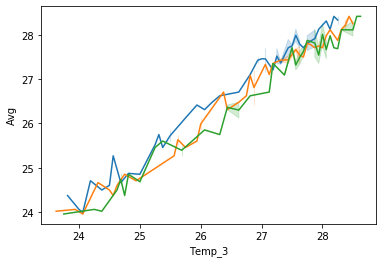

In [100]:
sns.lineplot(x="Temp_1", y="Avg",data=data_time)
sns.lineplot(x="Temp_2", y="Avg",data=data_time)
sns.lineplot(x="Temp_3", y="Avg",data=data_time)


In [157]:
from scipy.stats.stats import pearsonr 
data_time=data_time.dropna()
print (pearsonr(data_time['Temp_1'], data_time['Avg']))

(0.9890190103908794, 4.7359405705037186e-232)


In [150]:
# let's modify a dataframe to hold the start time of the window and the end time 
# to hold our time stamps (for a particular average)
# mean of the 30 temperature along with the degree of freedom that we have and return the dataframe 
def moving_average(dataframe,window = 10,lag = 6):
    win_start_time = collections.deque()
    win_end_time = collections.deque()
    avg = collections.deque()
    for iloc in range(0,len(dataframe.index.values),lag):
        win_start_time.append(dataframe.index.values[iloc:iloc+window].min())
        win_end_time.append(dataframe.index.values[iloc:iloc+window].max()) 
        sample = np.array(dataframe['Avg'].iloc[iloc:iloc+window].values, dtype=np.float64)
        avg.append(np.nanmean(sample))
    data = {'Start time' : list(win_start_time), 'End time': list(win_end_time), 'Average' : list(avg)}
    
    mov_avg_df = pd.DataFrame(data)
    
    return mov_avg_df 

#print(mov_avg_df)

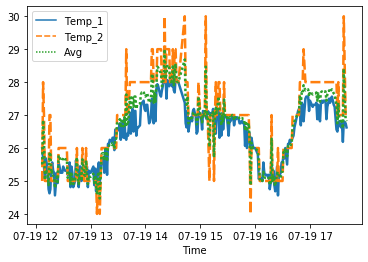

In [162]:
date_time=[]
tmp_1=[]
tmp_2=[]
avg=[]
#specifying every n'th minute
time=1
#counter
c=time
for obj in data_2.find():
    time_h=(obj['Date-Time'])
    if("07/19/2019" in time_h):
        if(c==time):
            date_time.append(datetime.strptime(obj['Date-Time'],'%m/%d/%Y %H:%M'))
            tmp_1.append(float(obj['tmp_1']))
            tmp_2.append(float(obj['tmp_2']))
            avg.append((float(obj['tmp_1'])+float(obj['tmp_2']))/2)
    
    d_2 = {'Time':date_time,'Temp_1':tmp_1,'Temp_2':tmp_2,'Avg':avg}
    data_time_2=pd.DataFrame(d_2)
    data_time_2=data_time_2.set_index('Time')
sns.lineplot(palette="tab10", linewidth=2.5,data=data_time_2)

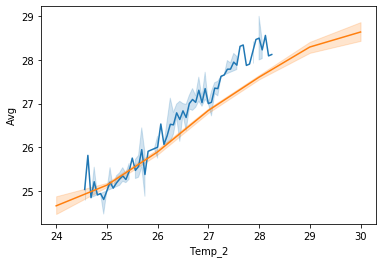

In [163]:
sns.lineplot(x="Temp_1", y="Avg",data=data_time_2)
sns.lineplot(x="Temp_2", y="Avg",data=data_time_2)
